In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from category_encoders import MEstimateEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/melbourne-housing-snapshot/melb_data.csv


In [2]:
melbourne_file_path = '../input/melbourne-housing-snapshot/melb_data.csv'
df = pd.read_csv(melbourne_file_path)
df_house = df.copy()

### Data Observation, Cleaning

In [3]:
df_house

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [4]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
# Set Date column into Datetime

df_house['Date'] = pd.to_datetime(df_house['Date'], dayfirst=True)

In [6]:
# fill NA with zero

df_house['Car'] = df_house['Car'].fillna(0)

In [7]:
# fill NA with median values

building_area = df_house['BuildingArea'].median()
df_house['BuildingArea'] = df_house['BuildingArea'].fillna(building_area)

In [8]:
df_house['YearBuilt'] = df_house['YearBuilt'].fillna(0)

In [9]:
df_house['CouncilArea'].fillna('Not Provided', inplace = True)

In [10]:
df_house.duplicated().sum()

0

In [11]:
df_house.describe()

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,2017-01-28 20:25:03.622974976,10.137776,3105.301915,2.914728,1.534242,1.602725,558.416127,139.633972,1187.056996,-37.809203,144.995216,7454.417378
min,1.000000,8.500000e+04,2016-01-28 00:00:00,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,2016-09-10 00:00:00,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,122.000000,0.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,2017-03-04 00:00:00,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1925.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,2017-06-24 00:00:00,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,129.940000,1975.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,2017-09-23 00:00:00,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000
std,0.955748,6.393107e+05,NaN,5.868725,90.676964,0.965921,0.691712,0.966548,3990.669241,392.217403,961.246692,0.079260,0.103916,4378.581772


In [12]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  float64       
 10  Bedroom2       13580 non-null  float64       
 11  Bathroom       13580 non-null  float64       
 12  Car            13580 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   13580 non-null  float64       
 15  YearBuilt      1358

### EDA

In [13]:
fig = px.histogram(df_house,
                x = 'Price',
                marginal = 'box',
                color = 'Type',
                title = 'Melbourne House Price by Type')
fig.update_layout(bargap= 0.1, width = 1200, height = 800)
fig.show()

In [14]:
fig = px.histogram(df_house,
                x = 'Price',
                marginal = 'box',
                color = 'Method',
                title = 'Melbourne House Price by Selling Method')
fig.update_layout(bargap= 0.1, width = 1200, height = 800)
fig.show()

In [15]:
top10_seller = df_house['SellerG'].value_counts().sort_values(ascending = False).head(10)

top10 = top10_seller.reset_index()
top10.columns = ['SellerG', 'count']

fig = px.bar(top10,
            x = 'SellerG',
            y = 'count',
            title = 'Top 10 Seller With Most Sales',
            labels = {'category': 'SellerG', 'count': 'Count'})
fig.update_traces(marker = dict(color = 'Teal'))
fig.update_layout(width = 1200, height = 800)
fig.show()

In [16]:
df_index = df_house.set_index('Date')

fig = px.scatter(df_house, 
                 x='Date', 
                 y='Price', 
                 title='House Sales Over Time')

fig.update_layout(width=1200, height = 800)
fig.show()

In [17]:
df_index = df_house.set_index('Price')

fig = px.scatter(df_house, 
                 x='Distance', 
                 y='Price', 
                 title='House Sales By Distance')

fig.update_traces(marker= dict(color='teal'))
fig.update_layout(width=1200, height = 800)
fig.show()

<Axes: title={'center': 'Longitude vs Latitude Values'}, xlabel='Lattitude', ylabel='Longtitude'>

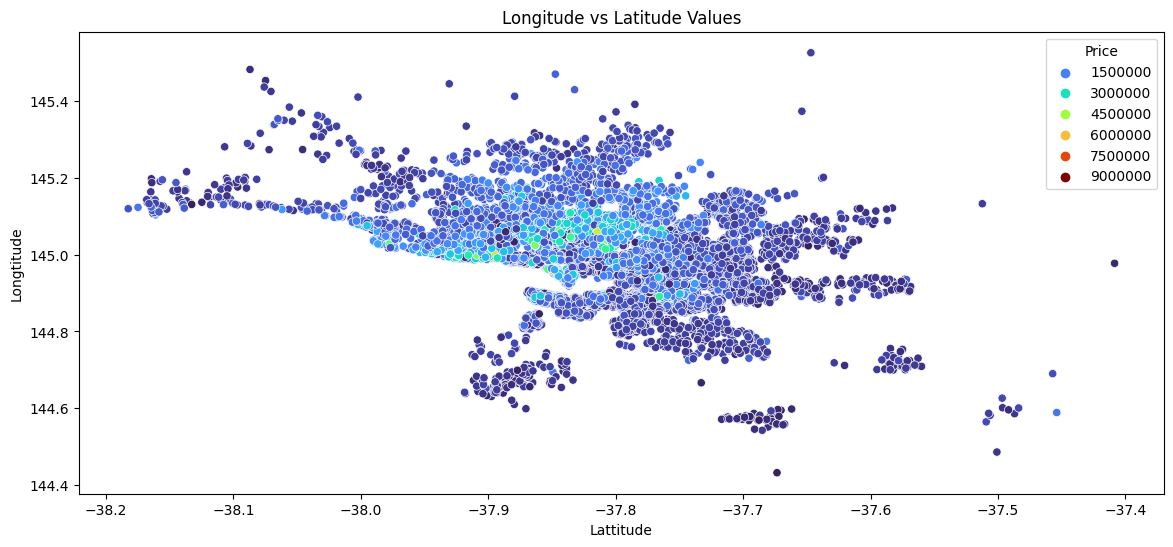

In [18]:
plt.figure(figsize=(14,6))
plt.title('Longitude vs Latitude Values')
sns.scatterplot(x = 'Lattitude', 
                y = 'Longtitude', 
                hue = 'Price',
                data = df_house,
                palette = 'turbo')

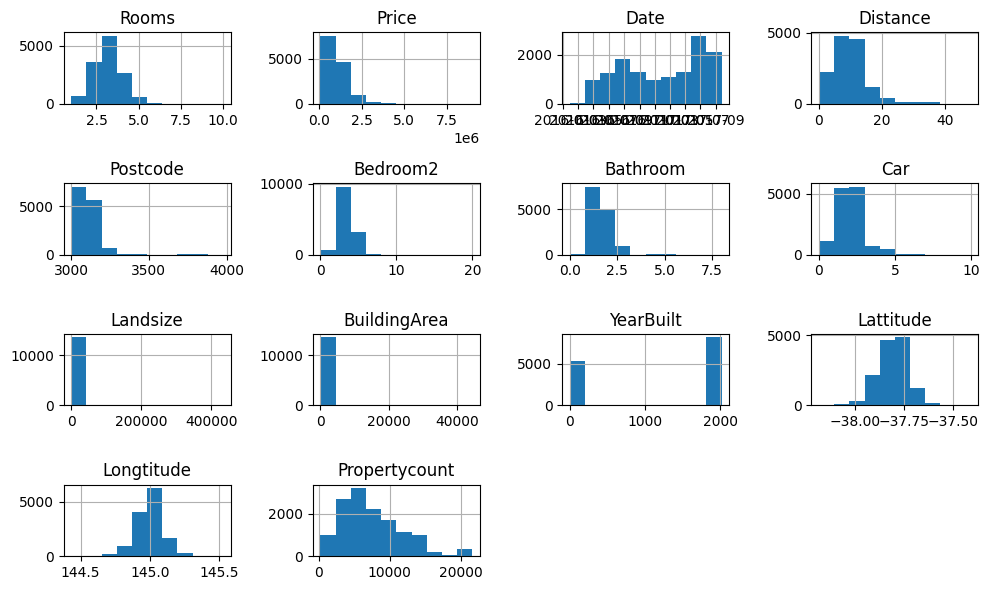

In [19]:
df_house.hist(figsize=(10, 6))
plt.tight_layout()

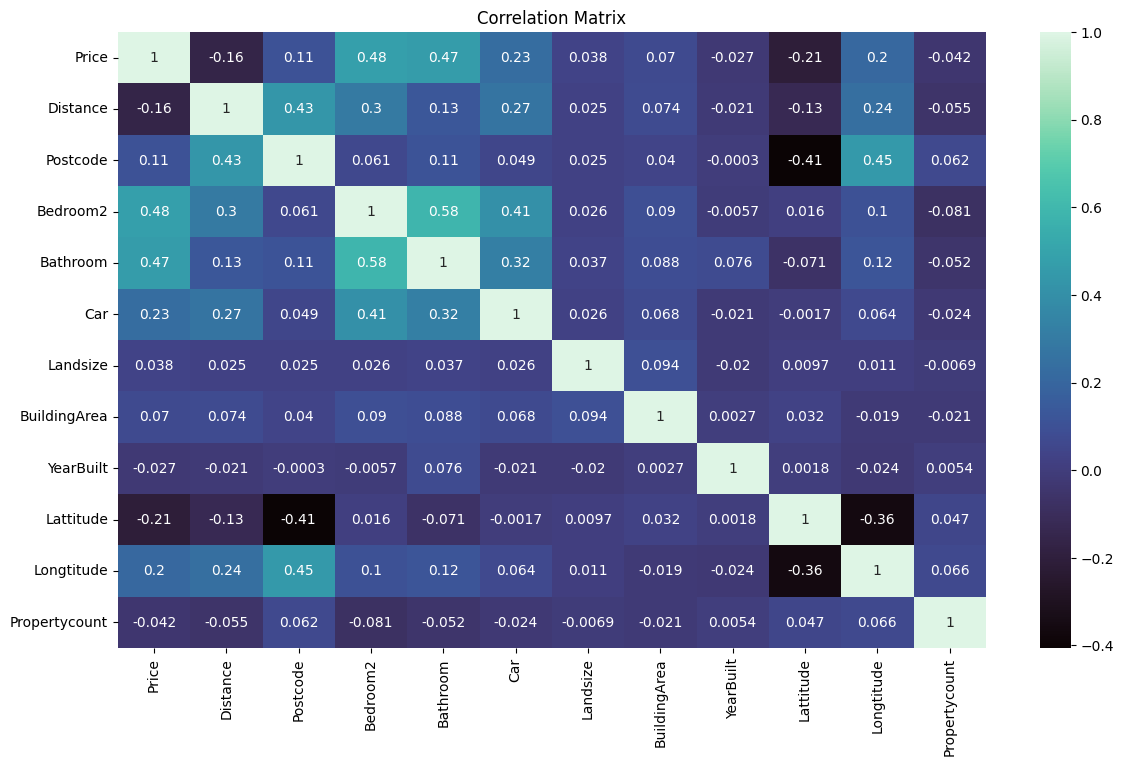

In [20]:
numeric_columns = df_house.select_dtypes('float64', 'int64')
corr_matrix = numeric_columns.corr()

plt.figure(figsize =(14,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'mako')
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing

In [21]:
df_train = df_house.drop(['Date'], axis = 1)

In [22]:
x = df_train.drop('Price', axis = 1)
y = df_train['Price']

In [23]:
object_cols = df_train.select_dtypes(include = 'object').columns.tolist()

MEncoder = MEstimateEncoder(cols = object_cols, m = 0.5)
x = MEncoder.fit_transform(x, y)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [25]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### Data Modeling, Prediction

In [26]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [27]:
lr_pred = lr.predict(x_test)
lr_plot = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': lr_pred})

lr_plot.head()

,Actual Values,Predicted Values
1061,2600000.0,2.569209e+06
6482,620000.0,6.319658e+05
8395,1000000.0,1.000041e+06
4659,430000.0,4.449050e+05
7386,392250.0,4.087941e+05


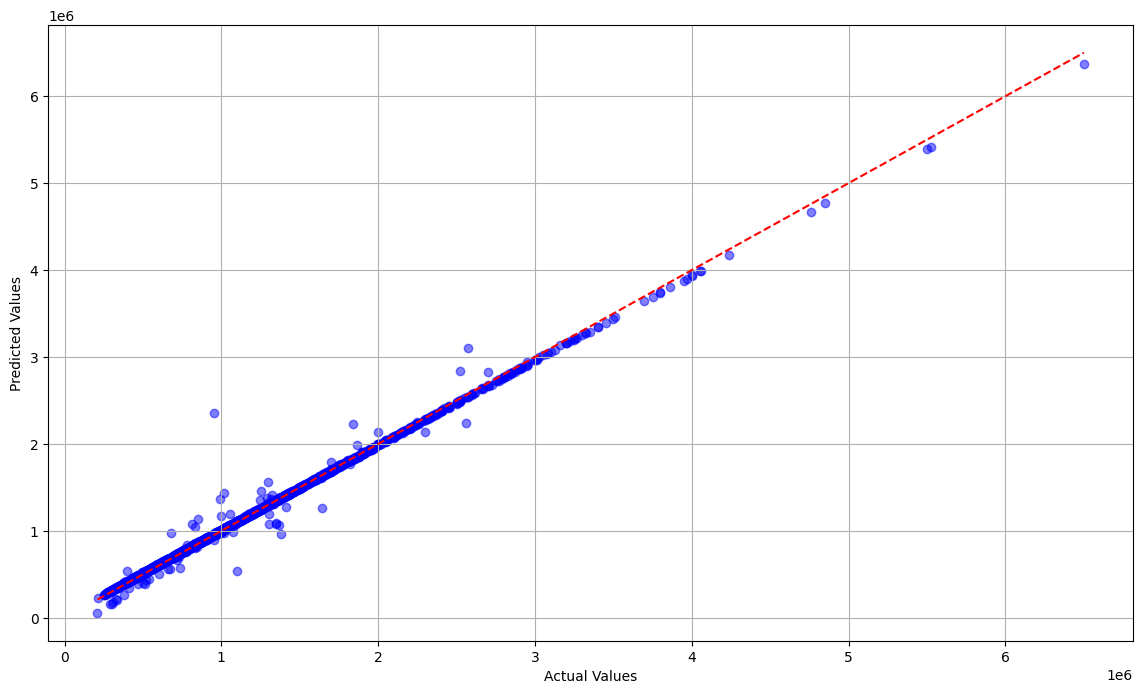

In [28]:
plt.figure(figsize = (14,8))
plt.scatter(y_test, lr_pred, color = 'blue', alpha = 0.5)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color = 'red', linestyle = '--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

In [29]:
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)

lr_r2

0.9951789947120944

### Random Forest

In [30]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [31]:
rf_pred = rf.predict(x_test)
rf_plot = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': rf_pred})

rf_plot.head()

,Actual Values,Predicted Values
1061,2600000.0,2578200.0
6482,620000.0,629160.0
8395,1000000.0,1003285.0
4659,430000.0,441930.0
7386,392250.0,404845.0


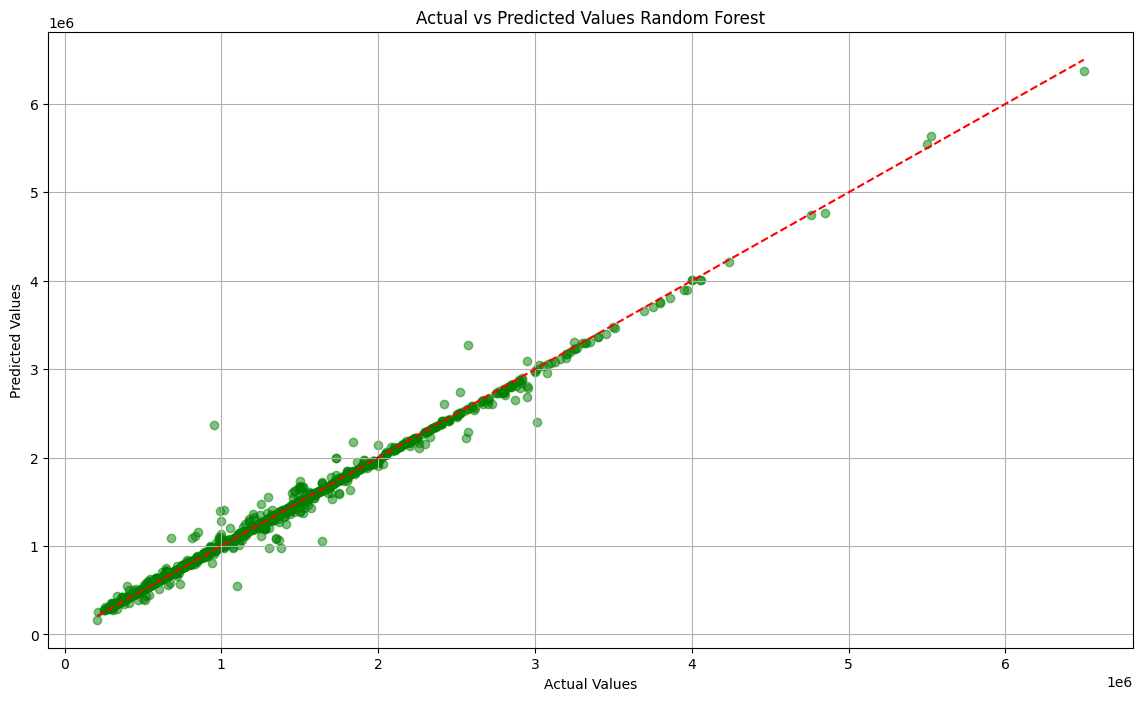

In [32]:
plt.figure(figsize = (14, 8))
plt.scatter(y_test, rf_pred, color = 'green', alpha = 0.5)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], color = 'red', linestyle = '--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values Random Forest')
plt.grid()
plt.show()

### Model Metrics

In [34]:
models = ['Linear Regression', 'Random Forest']
data = [[lr_r2, lr_mse, lr_mae],[rf_r2, rf_mse, rf_mae]]
cols = ['R2', 'MSE', 'MAE']
pd.DataFrame(data, columns = cols, index = models).sort_values(ascending = False, by = 'R2')

,R2,MSE,MAE
Linear Regression,0.995179,1.914970e+09,13868.899113
Random Forest,0.992862,2.835501e+09,18907.851741
